<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Thank you for taking the time to improve the project! It is accepted now. Keep up the good work on the next sprint!

</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but there are some small problems that need to be fixed before the project is accepted. Let me know if you have any questions!

# Supervised Learning: Predicting Customer Churn at Beta Bank


Beta Bank is concerned with customer churn which is steady each month. They have tasked me with training a model which can predict whether a customer will leave the bank soon. 
To begin the task I will import the data, get and overview to see the condition of the data, I will correct and adjust as necessary. Once the data is ready for analysis I will begin by splitting the data and training a model without taking into account the imbalance of the classes. Then balance the classes and see if there is any improvement. Then I will employ any other strategies to improve my model's scores. The task is to create a model with and F1 score of .59 or higher. 

## Initializing

First I will import all the libraries I will be using for this task. Then I will import the data and get a first look at it 

In [1]:

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None 
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import shuffle

print('Project libraries were imported successfully')

Project libraries were imported successfully


In [2]:
df=pd.read_csv('/datasets/Churn.csv')

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


There are some NaN present in 'Tenure' that will need to be replaced

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
(df.isna().sum()/df.shape[0]*100)

RowNumber          0.00
CustomerId         0.00
Surname            0.00
CreditScore        0.00
Geography          0.00
Gender             0.00
Age                0.00
Tenure             9.09
Balance            0.00
NumOfProducts      0.00
HasCrCard          0.00
IsActiveMember     0.00
EstimatedSalary    0.00
Exited             0.00
dtype: float64

In [7]:
df.duplicated().sum()

0

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected!

</div>

## Preprocessing 

From our first look we can see that we have a few issues to resolve
- 9% of the column 'Tenure' is missing, this is significant. I will replace them with the median based on the customer age
- Tenure can be converted to an integer

In [8]:
for age in df['Age'].unique().tolist():
    age_df = df[df['Age'] == age].dropna()['Tenure']
    age_tenure_list = age_df.unique().tolist()
    if age_tenure_list != []:
        df.loc[(df['Age'] == age) & (df['Tenure'] != df['Tenure']), 'Tenure'] = random.choice(age_tenure_list)
    else:
        df.loc[(df['Age'] == age) & (df['Tenure'] != df['Tenure']), 'Tenure'] = df['Tenure'].median()

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.030400,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.889102,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


The missing values in Tenure have been replaced with the best fit possible without shifting the stats of the feature. I will now change the datatype to int

<div class="alert alert-success">
<b>Reviewer's comment</b>

Ok, great!

</div>

In [12]:
df['Tenure']= df['Tenure'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The last thing I will do is drop the unneccessary columns: 'CustomerId', 'RowNumber', 'Surname'. These will not be needed for our modeling 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Makes sense!

</div>

In [14]:
df = df.drop(['Surname', 'CustomerId', 'RowNumber'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Conclusion 
the date has been processed and is ready for our analysis. I investigated the condition of the data, I found and resolved incidences of missing data with care not to create bias.Datatypes were changed to fit the data more appropriately. Unnecessary columns were dropped. 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Good job on preprocessing!
    

</div>

## Machine Learning

### One Hot Encoding and Splitting the Data

First I will split the data and utilize one-hot encoding to create numerical features from the categorical ones in the original dataset

In [15]:
df_ohe = pd.get_dummies(df, drop_first=True) 
    

target = df_ohe['Exited']
features = df_ohe.drop(['Exited'], axis=1)
     
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.30, random_state=12345
)

features_test, features_valid, target_test, target_valid = train_test_split(
    features_test, target_test, test_size=0.50, random_state=12345
)
print('The train set is {},'.format(features_train.shape[0]) + ' 70% of the data')
print('The test set is {},'.format(features_test.shape[0]) + ' 15% of the data')
print('The validiation set is {},'.format(features_valid.shape[0]) + ' 15% of the test data')

print()

numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
           'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])


features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric]  = scaler.transform(features_test[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

print('Train features :', features_train.shape)
print('Train target   :',target_train.shape)
print('Test features  :',features_test.shape)
print('Test target    :',target_test.shape)
print('Validation features  :',features_valid.shape)
print('Validation target    :',target_valid.shape)

display(features_train.head())

The train set is 7000, 70% of the data
The test set is 1500, 15% of the data
The validiation set is 1500, 15% of the test data

Train features : (7000, 11)
Train target   : (7000,)
Test features  : (1500, 11)
Test target    : (1500,)
Validation features  : (1500, 11)
Validation target    : (1500,)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9716,1.658077,0.012853,-0.023937,0.635477,2.527132,0.645536,0.955284,1.480907,1,0,1
224,0.198643,0.584111,0.323693,0.375870,-0.895510,0.645536,0.955284,0.153167,1,0,1
589,-1.374648,0.774530,0.323693,1.302947,0.815811,-1.549099,-1.046809,0.817773,0,1,0
7507,-0.784664,0.488901,1.366581,0.696496,-0.895510,0.645536,-1.046809,0.329403,1,0,1
1457,2.051400,2.583513,-0.371566,-1.222967,0.815811,-1.549099,0.955284,-0.617269,0,0,1


The categorical features have been encoded using one-hot encoding.To avoid the dummy trap it is best to remove one of the columns as they just confirm each other. My training dataset is 70% of the original data and the test and validation are each 15%

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great! Categorical features were encoded successfully. The data was split into train, validation and test sets. Scaling was applied correctly

</div>

### Investigating class imbalances

In [16]:
def model_evaluation(y_test, test_predictions, probabilities_one_valid):
    print('F1 score: ' '{:.3f}'.format(f1_score(y_test, test_predictions)))
    print('Accuracy Score: ''{:.2%}'.format(accuracy_score(y_test, test_predictions)))
    print('Precision: ''{:.3f}'.format(precision_score(y_test, test_predictions)))
    print('Recall: ' '{:.3f}'.format(recall_score(y_test, test_predictions)))
    print('Balanced Accuracy Score: ' '{:.2%}'.format(balanced_accuracy_score(y_test, test_predictions)))
    print('ROC AUC Score: ''{:.2%}'.format(roc_auc_score(y_test, probabilities_one_valid)))
    print()
    print('Confusion Matrix' )
    print()
    print(confusion_matrix(y_test, test_predictions))
    print()
    print('Classification report')
    print()
    print(classification_report(y_test, test_predictions))
    print()

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

To calculate ROC-AUC we need a different input than other metrics: probabilities (method `predict_proba`) rather than binary predictions (method `predict`). The reasons is that the ROC curve is constructed by varying the threshold of assigning positive class from 0 to 1, and for binary predictions the threshold is predefined.

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Fixed!

</div>

#### Baseline Model  
to look into class imbalance I will first create a baseline model using the Dummy Classifier

In [17]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_train, target_train)
dummy_clf_test_predictions = dummy_clf.predict(features_test)
dummy_probabilities_valid = dummy_clf.predict_proba(features_test)
dummy_probabilities_one_valid = dummy_probabilities_valid[:, 1]

In [18]:
model_evaluation(target_test, dummy_clf_test_predictions,dummy_probabilities_one_valid)

F1 score: 0.000
Accuracy Score: 79.53%
Precision: 0.000
Recall: 0.000
Balanced Accuracy Score: 50.00%
ROC AUC Score: 50.00%

Confusion Matrix

[[1193    0]
 [ 307    0]]

Classification report

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1193
           1       0.00      0.00      0.00       307

    accuracy                           0.80      1500
   macro avg       0.40      0.50      0.44      1500
weighted avg       0.63      0.80      0.70      1500




<div class="alert alert-warning">
<b>Reviewer's comment</b>

Not sure why model evaluation function is only used only to evaluate the dummy model :)

</div>

Though the initial accuracy is pretty good at 79%, our baseline model reports an F1 score of 0, I think we can improve on that quite a bit by balancing the classes. Now I will train the model without taking into account the imbalance of the classes 

In [19]:
def logistic_regression(X_train, y_train, X_test, y_test):

    model = LogisticRegression(random_state=12345, solver='liblinear')
    model.fit(X_train, y_train) 
    train_predictions_lr = model.predict(X_train) 
    test_predictions_lr = model.predict(X_test) 
    probabilities_valid = model.predict_proba(X_test)
    probabilities_one_valid_lr = probabilities_valid[:, 1]
    return model_evaluation(target_valid, test_predictions_lr, probabilities_one_valid_lr)


In [20]:
logistic_regression(features_train, target_train, features_valid, target_valid)


F1 score: 0.281
Accuracy Score: 79.53%
Precision: 0.556
Recall: 0.188
Balanced Accuracy Score: 57.37%
ROC AUC Score: 73.97%

Confusion Matrix

[[1133   48]
 [ 259   60]]

Classification report

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1181
           1       0.56      0.19      0.28       319

    accuracy                           0.80      1500
   macro avg       0.68      0.57      0.58      1500
weighted avg       0.76      0.80      0.75      1500




<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

1. The test set should always only be used once in the entire project: to evaluate the final model and get an unbiased estimate of how well the final model generalizes to new data. If the test set is used anywhere else, the result is potentially overly optimistic. Please use the validation set instead to compare different models, hyperparameters and balancing techniques
    
2. Please also calculate ROC-AUC so we could compare how balancing techniques impact ROC-AUC and F1 score

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Great!

</div>

0    0.798429
1    0.201571
Name: Exited, dtype: float64


''

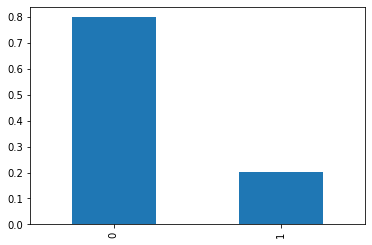

In [21]:
class_frequency= target_train.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')
;

now we can see the class imbalance, time to adjust it and improve the quality of our model 

<div class="alert alert-warning">
<b>Reviewer's comment</b>

The distribution of classes in the predictions is not really the right tool to make judgements about the balance of classes (predictions can be wrong for all we know). I would suggest looking at the distribution of train set targets instead

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Ok!

</div>

### Improving Model Quality
#### Balancing Classes
I will adjust the class weight by making it 'balanced' when I call the model.

In [22]:
model = LogisticRegression(random_state=12345, class_weight='balanced', solver='liblinear')
model.fit(features_train, target_train)
test_predictions = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1] 
model_evaluation(target_valid, test_predictions, probabilities_one_valid)
print('F1 score : {:.3f}'.format(f1_score(target_valid, test_predictions)))

F1 score: 0.482
Accuracy Score: 69.87%
Precision: 0.380
Recall: 0.658
Balanced Accuracy Score: 68.39%
ROC AUC Score: 74.41%

Confusion Matrix

[[838 343]
 [109 210]]

Classification report

              precision    recall  f1-score   support

           0       0.88      0.71      0.79      1181
           1       0.38      0.66      0.48       319

    accuracy                           0.70      1500
   macro avg       0.63      0.68      0.63      1500
weighted avg       0.78      0.70      0.72      1500


F1 score : 0.482


0    0.610667
1    0.389333
dtype: float64


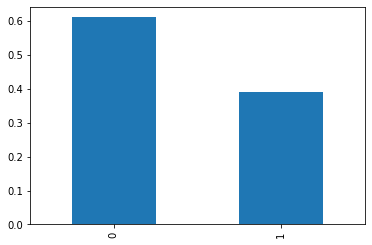

In [23]:
# sanity check after class imbalance
test_predictions = pd.Series(model.predict(features_test))
class_frequency = test_predictions.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

By making the less common outcomes weigh more we create much more balance in the classes. 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Class weights were applied correctly

</div>

#### Upsampling
Now I will upsample the data and tune the hyperparameters to try to improve our outcomes even further 

In [24]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(
    features_train, target_train, 5
)

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Upsampling was correctly applied only to the train set, but is the `repeat=5` really the best possible value? Are there actually 5 times more zeros than ones?

</div>

In [25]:
model = LogisticRegression(random_state=12345, solver='liblinear',)
model.fit(features_upsampled, target_upsampled)
test_predictions = model.predict(features_test) 
print('F1 score with upsampling: {:.3f}'.format(f1_score(target_test, test_predictions)))

F1 score with upsampling: 0.486


In [26]:
logistic_regression = LogisticRegression(
    class_weight='balanced',
    solver='liblinear',
random_state=12345).fit(features_upsampled, target_upsampled)
test_predictions = logistic_regression.predict(features_valid)

probabilities_valid = logistic_regression.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1] 

model_evaluation(target_valid, test_predictions, probabilities_one_valid)



F1 score: 0.482
Accuracy Score: 69.87%
Precision: 0.380
Recall: 0.658
Balanced Accuracy Score: 68.39%
ROC AUC Score: 74.40%

Confusion Matrix

[[838 343]
 [109 210]]

Classification report

              precision    recall  f1-score   support

           0       0.88      0.71      0.79      1181
           1       0.38      0.66      0.48       319

    accuracy                           0.70      1500
   macro avg       0.63      0.68      0.63      1500
weighted avg       0.78      0.70      0.72      1500




Through balancing the class weight and upsampling we have improved the F1 score from .3 to .481. 

#### Hyperparameters 
Now I will tune the hyperparameters by choosing the best combination of depth and n_estimators for our model

In [27]:

for depth,estimator in itertools.product(range(1,30,10), range(1,151,50)):
    model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=estimator, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    score = accuracy_score(predictions, target_valid)
    fscore = f1_score(target_valid, predictions)
    print('Depth: {: >5.0f}       :   Estimators: {:>5.0f}'.format(depth, estimator))
    print('Accuracy: {: >5.4f}   :   F1_Score: {: >5.4f}'.format(score,fscore))
    print('')

Depth:     1       :   Estimators:     1
Accuracy: 0.8060   :   F1_Score: 0.2027

Depth:     1       :   Estimators:    51
Accuracy: 0.7240   :   F1_Score: 0.5186

Depth:     1       :   Estimators:   101
Accuracy: 0.7267   :   F1_Score: 0.5199

Depth:    11       :   Estimators:     1
Accuracy: 0.7707   :   F1_Score: 0.5438

Depth:    11       :   Estimators:    51
Accuracy: 0.8333   :   F1_Score: 0.5915

Depth:    11       :   Estimators:   101
Accuracy: 0.8400   :   F1_Score: 0.6053

Depth:    21       :   Estimators:     1
Accuracy: 0.7893   :   F1_Score: 0.5138

Depth:    21       :   Estimators:    51
Accuracy: 0.8440   :   F1_Score: 0.5244

Depth:    21       :   Estimators:   101
Accuracy: 0.8460   :   F1_Score: 0.5177



<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

It doesn't make sense to fit the model using the validation set and evaluate it using the test set to tune hyperparameters. The model should be fit using the train set and evaluated using the validation set

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Excellent!

</div>

I can see that the F1 score reaches its peak with n_estimators at 101 and max_depth of 11. Lets try a model with these hyperparameters

#### Random Forest Classifier

In [28]:
model = RandomForestClassifier(n_estimators = 101, max_depth=11, class_weight='balanced', random_state=12345)
model.fit(features_upsampled, target_upsampled)
test_predictions = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
model_evaluation(target_valid, test_predictions,probabilities_one_valid)
accuracy= accuracy_score(test_predictions, target_valid)

F1 score: 0.614
Accuracy Score: 82.07%
Precision: 0.566
Recall: 0.671
Balanced Accuracy Score: 76.60%
ROC AUC Score: 85.35%

Confusion Matrix

[[1017  164]
 [ 105  214]]

Classification report

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1181
           1       0.57      0.67      0.61       319

    accuracy                           0.82      1500
   macro avg       0.74      0.77      0.75      1500
weighted avg       0.83      0.82      0.83      1500




Brilliant, these scores look good. Lets do some final tests.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Two things:
    
1. As noted above the validation set instead of the test set should be used to compare different models/hyperparameters/balancing techniques
2. Could you please also add ROC-AUC score for all models above so that we could compare the effect of balancing techniques on F1 score and ROC-AUC?

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Alright, both problems are gone!

</div>

### Final Tests
Now that we have our model we can concatonate our datasets and see how our working model tests.

In [29]:
features = pd.concat([features_train, features_valid])
target = pd.concat([target_train, target_valid])

features_upsampled, target_upsampled = upsample(features, target, 5)

model = RandomForestClassifier(random_state=12345, n_estimators=51, max_depth=11, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)

predicted_test = model.predict(features_test)

probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

model_evaluation(target_test, predicted_test,probabilities_one_valid)


F1 score: 0.625
Accuracy Score: 83.07%
Precision: 0.571
Recall: 0.691
Balanced Accuracy Score: 77.86%
ROC AUC Score: 85.61%

Confusion Matrix

[[1034  159]
 [  95  212]]

Classification report

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1193
           1       0.57      0.69      0.63       307

    accuracy                           0.83      1500
   macro avg       0.74      0.78      0.76      1500
weighted avg       0.85      0.83      0.84      1500




<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright, so this is the only model that should be evaluated using the test set

</div>

## Conclusion

Upon recieving and preparing the data for analysis I was able to replace 9% of the data from the tenure feature, changed datatypes, and utilized one-hot encoding to create numerical features for analysis. 
A model was then trained without taking into account the class imbalances and gave us a baseline of F1= 0.3. After correcting the class imbalance an improvement was observed, F1= .505. 
upsampling was used to improve the data further. 
Then the hyperparameters were tuned using the validation dataset. When trained with these hyperparameters Random Forest Classifier provided further improvement in the score, F1=0.63. 
In final testing, the training and validation dataset were concatonated, then upsampled, then trained the tuned model. 

From the raw dataset provided I have trained a Machine Learning model that can predict Bank customer churn with a final F1 score of .62. 

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Conclusions look good, but you might need to review them after fixing the problems above

</div>

Thank you for your time reviewing my model/project :)

<div class="alert alert-success">
<b>Reviewer's comment</b>

You're welcome! :)

</div>